# Logistic Regression




## Overview 


Logistic Regression is a Supervised Machine Learning **classification** algorithm. We used it to predict the probability that an event will occur. The response variable (what we try to predict), is a binary variable. In other words it has two classes (i.e. pass/ fail). Often represented as 0 and 1 respectively. The Logistic Regression Model predicts $P(y=1|X)$, which reads as the probability that $y$ will happen given $X$, where $X$ is the set of features (see lecture notes). 



### Problem Statement 

Heart disease is a global health threat. World Health Organisation (WHO) estimates that 17 million deaths occur worldwide due to Heart disease https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1. Early detection of heart-disease signs can greatly help reducing the death risk. In this project, we will use Logistic Regression to predict the overall risk of having a heart condition. 


### Dataset Source 

The dataset used in this tutorial is obtained from the UCI data repository. Details about the data and relevant papers can be found here https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

## Load and Explore the Dataset

Load the necessary libraries numpy arrays, pandas for data frames, seaborn for visualisation and matplitlib for visualisation.


In [1]:
# import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


* Load the file 
* View few records just to see how the data look like
* Check the dimension of the dataset

In [ ]:
df = pd.read_csv('../Data/heart.csv')
df.head()


### Quick Data Exploration 

In [3]:
# data size 
print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset contains 303 rows, and 14 columns


In [ ]:
# Always good to check the names of the columns 
df.columns

**Data Types**: The data contains mostly numerical values, which makes it easy to deal with. However, three features **cp**, **thal** and **slope**, are categorcial variables (they take the value 1, 2 or 3, etc...and we will later learn how to handle these). However, to double check the data types we can issue the following Python statement:

In [5]:
# and check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Features Values**: An important piece of information about the dataset, is the unique values that are present in each feature. We know that the target value (class label), has either 0 or one value, but what about the rest of features? Here is how can obtain this information: 

In [6]:
# for every column 
for i in df.columns:
    # print how many features it has 
    print(i,len(df[i].unique()))


age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [7]:
# print these unique values for columns that have less than 10 unique values 
# for every column 
for i in df.columns:
    # print how many features it has 
    if len(df[i].unique())<10:
        print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')


sex has 2 unique values, These are: [1 0]
cp has 4 unique values, These are: [3 2 1 0]
fbs has 2 unique values, These are: [1 0]
restecg has 3 unique values, These are: [0 1 2]
exang has 2 unique values, These are: [0 1]
slope has 3 unique values, These are: [0 2 1]
ca has 5 unique values, These are: [0 2 1 3 4]
thal has 4 unique values, These are: [1 2 3 0]
target has 2 unique values, These are: [1 0]


**Describe**: Another useful function in Pandas is the **describe** function. It provides you with quick statistical information about the data set. The information below should be self explanatory (i.e. count, mean, std stands for standard deviation, min, max and the 25 quartiles, etc...). 

In [ ]:
df.describe()


**NOTE**: The table above shows that **25%** of patients in this dataset are below the age of **47**, **50%** of patients in this dataset are below the age of **55**, and so on. If you want to better understand these numbers, consider the simple code below: 

In [9]:
# number of rows of people in the dataset with age<47
n = df[df.age<=47].shape[0]

# print the percentage of those 
print ('Percentage of people under the age of 42 is ', round(n/df.shape[0],2)*100)

Percentage of people under the age of 42 is  25.0


In [10]:
# similarily for the 50% percentile 
# number of rows of people in the dataset with age<55
n = df[df.age<=55].shape[0]

# print the percentage of those 
print ('Percentage of people under the age of 49 is ', round(n/df.shape[0],2))

Percentage of people under the age of 49 is  0.5


Same numbers obtained using the **describe()** function above regarding the quantiles, can also be accessed using the pandas function: 

In [ ]:
df.quantile([.1, .25, .5, .75], axis = 0) 


**Class Distribution** 

One of the important things you always need to check in your dataset, is the class distribution. This is an important research problem, and if the class-distribution of the dataset is largely imbalanced, then it could affect the performance of the machine learning algorithm. This can be done easily as follows: 


In [12]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

You may also want to visualise this distribution, among other aspects of the dataset. We can do this using the **seaborn** python library. But, first we will create a copy of the dataset, change some values to give it more meaningful names (i.e. 0 will be changed to male, and so on):


In [13]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

# first we make a copy of the dataset to decode the variables (for visualisation purposes)
dfC = df.copy()
# simple function to change sex values
def changeS(sex):
    if sex == 0:
        return 'Female'
    else:
        return 'Male'

# apply the above function to the whole column in the dataset
dfC['sex'] = dfC['sex'].apply(changeS)
# function to change taget
def changeT(label):
    if label == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
dfC['target'] = dfC['target'].apply(changeT)

Although the above step may not be necessary, it does help producing a meaningful annotation of the plots. The code below produces a figure that shows the distribution of patients with /without heart condition according to the gender. 

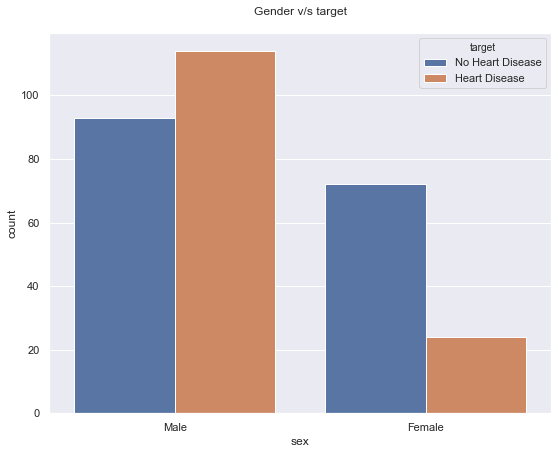

In [14]:
sns.set(rc={'figure.figsize':(9,7)})

sns.countplot(data= dfC, x='sex',hue='target')
plt.title('Gender v/s target\n')
plt.show()

Box Plot is another useful visualisation that helps you gain more understanding about the dataset. Below is the code to generate a diagram that shows the 4 quartiles in of patients age grouped by having a heart condition or not? 

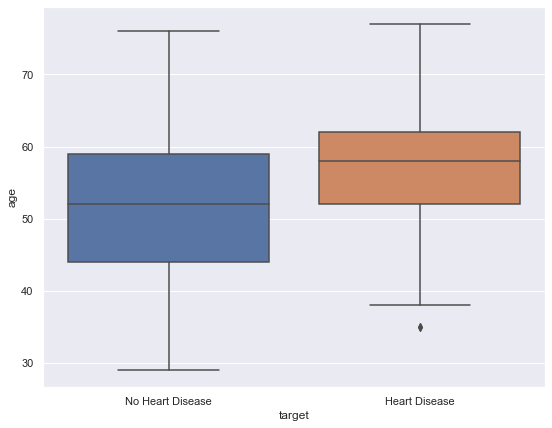

In [15]:
sns.boxplot(data=dfC,x='target',y='age')
plt.show()

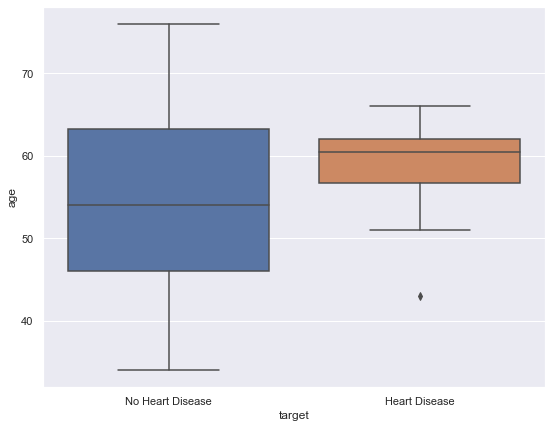

In [16]:

# you could always add condition to your code to explore specific category of patients (i.e. females)
sns.boxplot(data=dfC[dfC.sex=='Female'],x='target',y='age')
plt.show()

You may also want to check the percentages of patients with and without heart conditions. There are so many ways to do thing in python, here is one way. It should be noted that this data is not imbalanced, as can be seen below:

In [17]:
patients_with_disease = len(df[df.target==1])
patients_no_disease = len(df[df.target==0])
print(f'Percentage of Patients with Heart Conditions is {round(patients_with_disease/df.shape[0]*100,2)}' )
print(f'Percentage of Patients with no Heart Conditions is {round(patients_no_disease/df.shape[0]*100,2)}' )

Percentage of Patients with Heart Conditions is 54.46
Percentage of Patients with no Heart Conditions is 45.54


Pandas provides a lot of useful features that you can use to explore that data. One of these is the **groupby( )** function. Below, we will use it to look at the mean value of all measurements grouped by the target value (class label).  For example, it can be noted from below, that the average age of patients with no disease is 56, while for those of disease is 52. 

In [ ]:
df.groupby('target').mean()

In [ ]:
# you can also group by more than one variable as below
df.groupby(['sex','target']).mean()

You can also condition on some values, then groupby. Below, we want to show the average age of patients with no disease who are women? Notice that 1 = male, and 0 = women ) / https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
# or condition and then group by. 
df[df.sex==0].groupby('target').mean()

In [ ]:
# average age of men with disease? 
df[(df.sex==1) &(df.target==1)].groupby('target').mean()

### Categorical Variables 

According to the dataset description four features **cp**, **thal** and **slope**, and **restecg**  are categorical variables (they have discrete values). We can check this as follows: 


In [22]:
# show few values of the above four columns 
df[['cp','thal','slope','restecg']].head()

,cp,thal,slope,restecg
0,3,1,0,0
1,2,2,0,1
2,1,2,2,0
3,1,2,2,1
4,0,2,2,1


In [23]:
# now lets check the unique values of these categorical variables 
cat_variables = ['cp','thal','slope','restecg']
for i in cat_variables:
    # print how many features it has 
    print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')


cp has 4 unique values, These are: [3 2 1 0]
thal has 4 unique values, These are: [1 2 3 0]
slope has 3 unique values, These are: [0 2 1]
restecg has 3 unique values, These are: [0 1 2]


Notice that the above values of the categorical variables 'cp','thal','slope','restecg', represent categories, and not numerical values, and therefore, we need to turn these categorical values into dummy variables as follows: 


In [24]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['slope'], prefix = "restecg")

**Dummy Variables**: The statements above, creates four different dataframes, each represent one categorical variable. Check below how the variable **cp** is changed into four different columns (**'cp_0', 'cp_1', 'cp_2', 'cp_3**), and the same for the other dummy variables

In [25]:
type(a)
a.head()

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


* Now, lets drop the original categorical variables from the dataframe **df**

In [26]:
df = df.drop(cat_variables, axis = 1)

* Now we will add the generated dummy variables to the dataframe 


In [ ]:

# combine all data frames 
df_tmp = [df, a, b, c,d] 
df = pd.concat(df_tmp, axis = 1)
df.head()

### Missing Values 

Most datasets will have some form of missing values. So, it is important to check for any missing values within the data. This can be easily done in Python as follows; 

In [28]:
df.isnull().sum()



age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
target       0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
slope_0      0
slope_1      0
slope_2      0
restecg_0    0
restecg_1    0
restecg_2    0
dtype: int64

Notice that according to the above results, we have no missing value in the dataset. However, this is not often the case with most datasets. There are various ways to handle missing values. Simplest way is to compute the mean value of a certain feature (column in the dataset), then assign that mean value to all missing values in the same column. Suppose that the variable **fbs** has some missing values, Below is the code to fill this variable missing values with the mean of that variable: 

In [29]:
# Compute the mean for fbs 
fbs_mean = round(df['fbs'].mean())
# assign the mean to the missing values 
df['fbs'].fillna(fbs_mean, inplace = True)


## Create your Logistic Regression Model 

The logistic Regression, is simple and easy to implement. It is one of the very common used algorithms in the industry. To better understand it, recall the linear regression that we discussed last week which is defined as $\hat{Y}=\theta_0+\theta_1 X_1+\theta_2 X_2+\cdots+\theta_p X_k+\epsilon$, and used for regression problems (i.e. predicting continuous variable). Similarly, Logistic Regression  is used for **classification** and is expressed as $\hat{Y}=\textbf{g}(\theta_0+\theta_1 X_1+\theta_2 X_2+\cdots+\theta_p X_k+\epsilon)$. Notice, the **g** function, which is a non-linear function. Although, the model can be implemented from scratch, we want here to use **sklearn** Python library to do so: 

### Prepare Features and Target Variables 

First, we need to prepare the data by splitting the dataframe (df) into a set of features **X** and a Target variable **y**. This is can be easily done as follows: 

In [30]:
# store the input features 
X = df.drop('target', axis = 1)
# store the label column into y variable 
y = df['target']


In [31]:
# uncomment the code below to check the type of x, y

#print(type(X))
#print(type(y))

### Split the Data 

This is very important step,  you need to hold part of your data (test set) to use after finishing the training process, to evaluate the performance of your model. This is one of the important way to ensure that your model is not **overfitting**. Below, we use the **train_test_split** to do this split (80% of the data for training, and 20% of the data for testing)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Normalising Data

Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. This is a good practice to put the data into a common scale and it helps supress the noise in the data. Normalising your data is simple, and can be expressed as follows:  $\Large x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}}$, and can be implemented in Python as follows: 

In [33]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)



### Create and Fit the Model 

We use the **LogisticRegression** from the **sklearn** library to create the Logistic Regression Model. Notice the **fit( )** method we use to fit our data into the model: 


In [34]:
from sklearn.linear_model import LogisticRegression
# notice that you can change the parameters of the model
lg_model = LogisticRegression(solver='lbfgs',max_iter=3000)
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Manual Error Inspection 

Lets first use our model to perform predictions on the dataset. Notice that we only pass the input features, and we will let the model predict the class. We can then compare the predicted values against the ground truth and further inspect the results. This is not a must-do step, but helps greatly understand the model's performance on specific instances: 


In [35]:
# predicted values 
y_pred = lg_model.predict(X_test)
# actual values 
actual = y_test


Sometimes it is good to do some manual inspections for the results. One way to do so is to save the predicted values, the actual values, and a column indicating if both values are equal in one data frame. Below is the code on how to do this. 

In [36]:
# create a dictionary and a data frame and check correct predictions 
dic = {'Actual':actual,
       'Prediction':y_pred,
       'correct_prediction':0
       }

result  = pd.DataFrame(dic)


In [37]:
# update the correct_prediction values to 1, if correct prediction
def myfunc(x,y):
    if x == y:
        return 1
    else:
        return 0
result['correct_prediction'] = result.apply(lambda x: myfunc(x.Actual, x.Prediction), axis=1)

* Notice now, you can view only the patients data that records that were incorrectly classified:

In [38]:
result[result.correct_prediction==0]

,Actual,Prediction,correct_prediction
228,0,1,0
52,1,0,0
97,1,0,0
194,0,1,0
241,0,1,0
92,1,0,0
188,0,1,0
302,0,1,0


* You can now manually compute the accuracy of your model. We will later compare this with the results we obtain from the sklearn library

In [39]:
print(f'Model Accuracy on Test Data is {len(result[result.correct_prediction==1])/len(result)}')

Model Accuracy on Test Data is 0.8688524590163934


In [40]:
# you can save the dataframe of the results for further inspection 
result.to_csv('test.csv')

### Model Evaluation

As discussed in the lecture, there are several metrics, that we can use to evaluate the model’s performance. You often don't need to do this manually as we did above. Below, we will again make use of the sklearn library to get the overall accuracy of the model: 



In [41]:
from sklearn.metrics import accuracy_score
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(y_test,y_pred),2)}')

The Model Accuracy on Testing Set is 0.87


* We can also get other metrics such as precision, recall and f1-score: 

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



The classification report of the model above shows that 88% prediction of absence of heart disease was predicted correct and 86% of presence of heart disease was predicted correct. One more useful metric to consider as we discussed in the lecture is the confusion matrix: 


In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[22  5]
 [ 3 31]]


(0, 2)

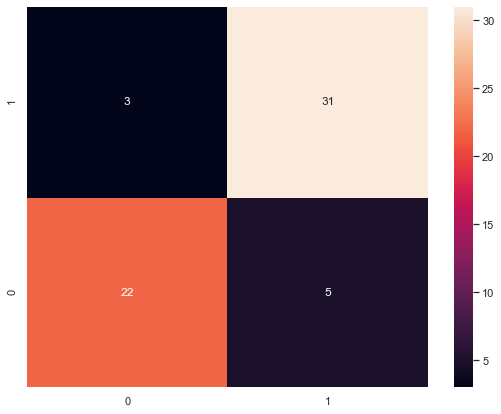

In [44]:

ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
ax.set_ylim([0,2])


The Confusion Matrix True Positive value is 31 and true Negative was 22. And the False Positive came out to be 3 and False Negative is 5.


## Save your Model

In the following few lines of code, our logistic regression model that created in the above sections will be saved into a file. Recall that our model above is named `lg_model`. Saving the model is important step for re-using the model, without the need to retrain it. Our model will be loaded as a new object called `pickled_model`. Once loaded, we can use it to calculate accuracy scores and do predictions as we did above. 


In [45]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_lr_model.pkl"
# save your model that was created above (lg_model) 
with open(pkl_filename, 'wb') as file:
    pickle.dump(lg_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Lets test the mode loaded from a file and check results 
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 86.89 %


Notice, that now if you check your current working directory, then you should find a file called `pickle_lr_model.pkl`. It must be noted also that you can use this model now in a `streamlit` application as we did in the previous week. If you have time, you should try this. 